<a href="https://colab.research.google.com/github/bhaskarverma1/-CodEvo-Solutions-AI-/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Accuracy: 0.916
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.94      0.94      1396
           7       0.92      0.94      0.93      1503
           8       0.90      0.86      0.88      1357
           9       0.89      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000

Confusion Matrix:
[[1286    1   11    0    1   11   21    4    6    2]
 [   0 1556    7   10    3    6    1    4   11    2]
 [   6   19 1233   18   13   13   20   18   29   11]
 [   7    9   37 1272    

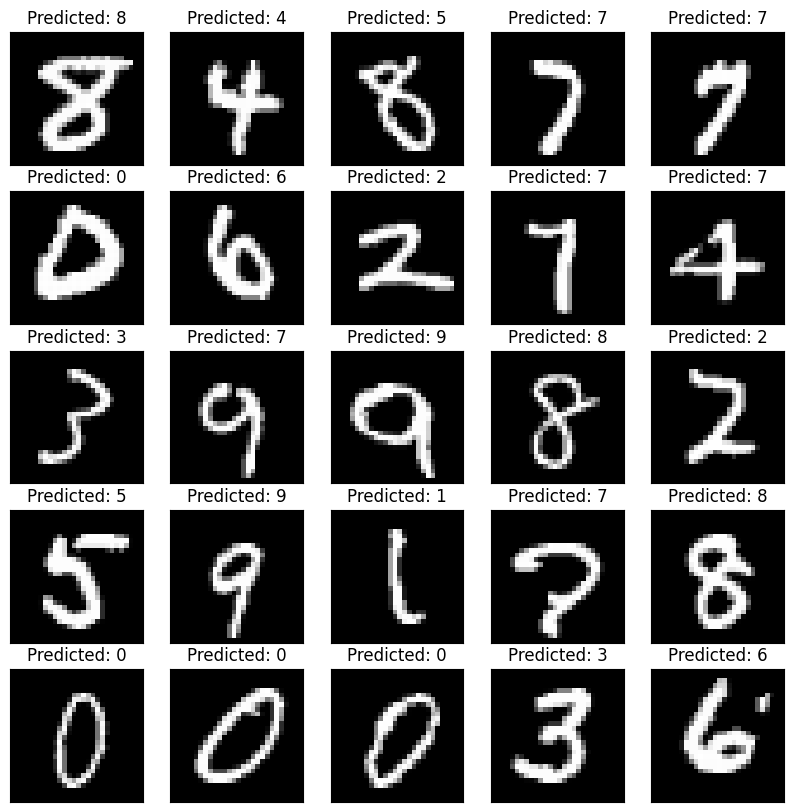

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
mnist = fetch_openml('mnist_784')

# Preprocess images
X = mnist.data.astype(np.float32)
y = mnist.target.astype(np.int32)

# Scale pixel values to [0, 1]
X_scaled = X / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_std, y_train)

# Evaluate model performance
y_pred = log_reg.predict(X_test_std)
y_pred_proba = log_reg.predict_proba(X_test_std)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Convert X_test to a NumPy array for plotting
X_test_array = X_test.to_numpy()  # Convert X_test to a NumPy array

# Plot some images with their predicted labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    # Use X_test_array for plotting
    plt.imshow(X_test_array[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {y_pred[i]}")
    plt.xticks([])
    plt.yticks([])
plt.show()